In [1]:
import pandas as pd 

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("Sample - Superstore.csv",encoding='ISO-8859-1')

In [6]:
# Step 2 : Quick overview 
print("First 5 rows:")
print(df.head())


First 5 rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     

In [7]:
print("\n Dataset Info:")
print(df.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float

In [6]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [8]:
print("\n Summary stats:")
print(df.describe())


 Summary stats:
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [9]:
# Step 2 : Clean and Prepare the Data 
# Check for duplicate rows : 
print(" Duplicate Rows:" , df.duplicated().sum()) 

 Duplicate Rows: 0


In [10]:
#2. Standardize column names 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [11]:
#3. Check data types and convert dates:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [12]:
# 4. Confirm cleaned data:
print(df.dtypes)
print(df.head(2))

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub-category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object
   row_id        order_id order_date  ship_date     ship_mode customer_id  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   

  customer_name   segment        country       city  ... postal_code  region  \
0 

In [13]:
#KPIs
# Overall KPIs
#Total Sales, Total Profit, Total Quantity Sold
#Overall Profit Margin
#Total Orders
print("📌 Total Sales:", df['sales'].sum())
print("📌 Total Profit:", df['profit'].sum())
print("📌 Total Quantity Sold:", df['quantity'].sum())
print("📌 Total Orders:", df['order_id'].nunique())
# Profit Margin :
profit_margin = df['profit'].sum()/df['sales'].sum()
print("📌 Overall Profit Margin:", round(profit_margin * 100 , 2) , "%")


📌 Total Sales: 2297200.8603000003
📌 Total Profit: 286397.0217
📌 Total Quantity Sold: 37873
📌 Total Orders: 5009
📌 Overall Profit Margin: 12.47 %


In [15]:
#Step 4: Sales & Profit Trends Over Time
# New column for Year-Month 
df['year_month'] = df['order_date'].dt.to_period('M')


In [16]:
# Group by Year_month and summarize : 
monthly_summary = df.groupby('year_month').agg({
    'sales' : 'sum', 
    'profit' : 'sum' 
}).reset_index()
print(monthly_summary)

   year_month        sales      profit
0     2014-01   14236.8950   2450.1907
1     2014-02    4519.8920    862.3084
2     2014-03   55691.0090    498.7299
3     2014-04   28295.3450   3488.8352
4     2014-05   23648.2870   2738.7096
5     2014-06   34595.1276   4976.5244
6     2014-07   33946.3930   -841.4826
7     2014-08   27909.4685   5318.1050
8     2014-09   81777.3508   8328.0994
9     2014-10   31453.3930   3448.2573
10    2014-11   78628.7167   9292.1269
11    2014-12   69545.6205   8983.5699
12    2015-01   18174.0756  -3281.0070
13    2015-02   11951.4110   2813.8508
14    2015-03   38726.2520   9732.0978
15    2015-04   34195.2085   4187.4962
16    2015-05   30131.6865   4667.8690
17    2015-06   24797.2920   3335.5572
18    2015-07   28765.3250   3288.6483
19    2015-08   36898.3322   5355.8084
20    2015-09   64595.9180   8209.1627
21    2015-10   31404.9235   2817.3660
22    2015-11   75972.5635  12474.7884
23    2015-12   74919.5212   8016.9659
24    2016-01   18542.491

In [17]:
#Plot Sales and Profit Trends:
%matplotlib inline 
import matplotlib.pyplot as plt 

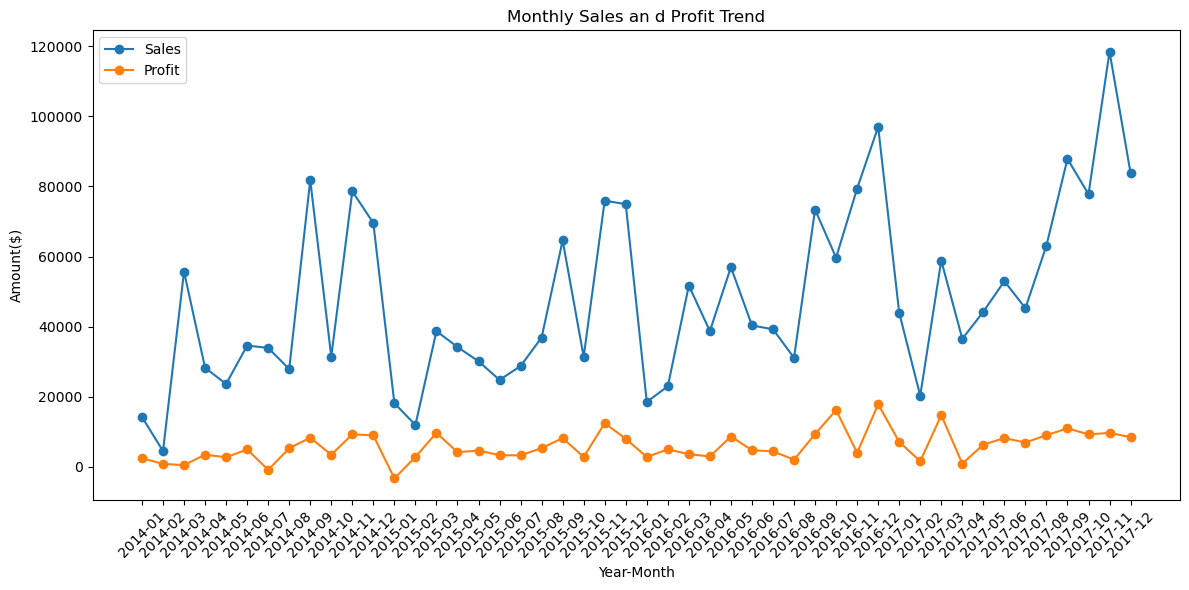

In [18]:
plt.figure(figsize= (12,6)) 
plt.plot(monthly_summary['year_month'].astype(str),monthly_summary['sales'], label='Sales', marker= 'o')
plt.plot(monthly_summary['year_month'].astype(str),monthly_summary['profit'], label='Profit', marker= 'o')
plt.xticks(rotation= 45)
plt.title("Monthly Sales an d Profit Trend") 
plt.xlabel("Year-Month")
plt.ylabel("Amount($)")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# Category and Sub-Category 
category_perf = df.groupby(['category', 'sub-category']).agg({
    'sales' : 'sum', 
    'profit' : 'sum' 
}).sort_values(by='sales', ascending = False).reset_index()

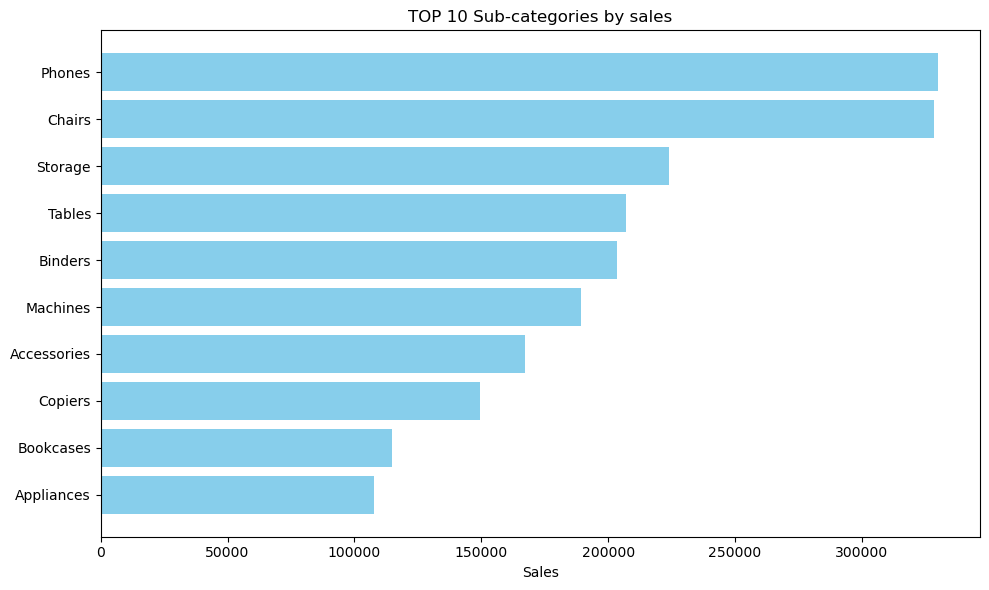

In [25]:
# Plot Top Sub-Categories by Sales 
top_sub = category_perf.sort_values(by= 'sales', ascending = False ).head(10) 

plt.figure(figsize= (10,6))
plt.barh(top_sub['sub-category'], top_sub['sales'], color='skyblue')
plt.xlabel("Sales")
plt.title("TOP 10 Sub-categories by sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [36]:
# Step 6: Region-wise Sales & Profit
region_pref= df.groupby('region').agg(
    { 'sales': 'sum', 
     'profit': 'sum'}).reset_index()
# Add Profit Margin column
region_pref['Profit Margin(%)'] = (region_pref['profit']/region_pref['sales'])*100

# Sort by Sales
region_pref= region_pref.sort_values(by='sales' , ascending = False)
print(region_pref)



    region        sales       profit  Profit Margin(%)
3     West  725457.8245  108418.4489         14.944831
1     East  678781.2400   91522.7800         13.483399
0  Central  501239.8908   39706.3625          7.921629
2    South  391721.9050   46749.4303         11.934342


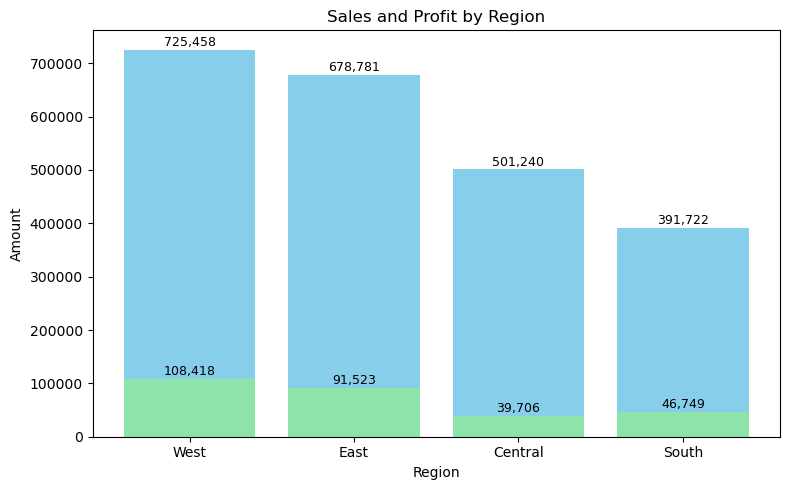

In [51]:
# Plot region wise sales and profit 
plt.figure(figsize=(8,5))
bars_1= plt.bar(region_pref['region'] , region_pref['sales'], color='skyblue', label= 'Sales')
bars_2 =plt.bar(region_pref['region'], region_pref['profit'], color='lightgreen' , label = 'Profit' , alpha = 0.7)
for bar in bars_1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000,  # x, y position
             f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)
for bar in bars_2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000,  # x, y position
             f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Sales and Profit by Region')
plt.legend
plt.tight_layout()
plt.show()


In [54]:
# Top & Bottom States by Profit
#Step 1: Top 10 States by Profit
top_profit_states= df.groupby('state')['profit'].sum().sort_values(ascending = False).head(10).reset_index()
print(top_profit_states)

        state      profit
0  California  76381.3871
1    New York  74038.5486
2  Washington  33402.6517
3    Michigan  24463.1876
4    Virginia  18597.9504
5     Indiana  18382.9363
6     Georgia  16250.0433
7    Kentucky  11199.6966
8   Minnesota  10823.1874
9    Delaware   9977.3748


In [57]:
# Step 2: Bottom 10 States by Profit (Most Loss-Making)
bottom_profit_states= df.groupby('state')['profit'].sum().sort_values(ascending= True).head(10).reset_index()
print(bottom_profit_states)

            state      profit
0           Texas -25729.3563
1            Ohio -16971.3766
2    Pennsylvania -15559.9603
3        Illinois -12607.8870
4  North Carolina  -7490.9122
5        Colorado  -6527.8579
6       Tennessee  -5341.6936
7         Arizona  -3427.9246
8         Florida  -3399.3017
9          Oregon  -1190.4705


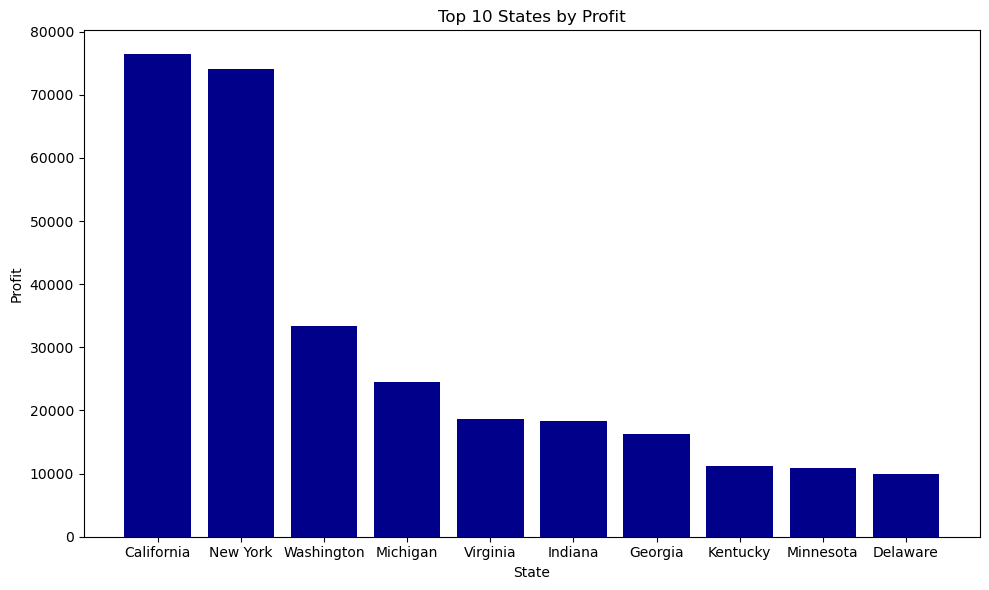

In [60]:
#Step 3: Plot Top 10 States by Profit
plt.figure(figsize=(10,6))
plt.bar(top_profit_states['state'] , top_profit_states['profit'], color= 'darkblue')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Top 10 States by Profit')
plt.tight_layout()
plt.show()

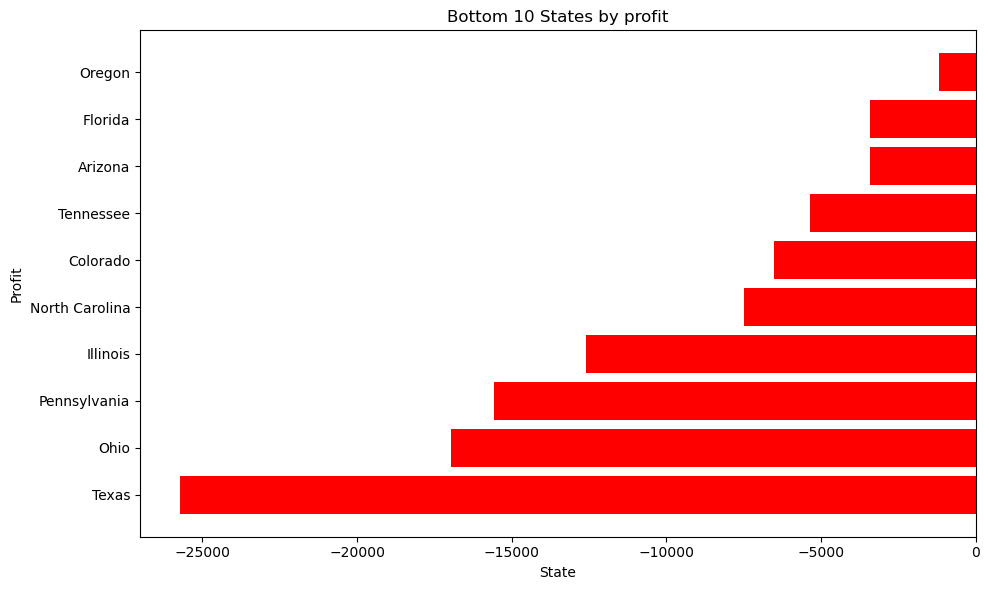

In [95]:
# Plot for Bottom 10 States by Profit
plt.figure(figsize=(10,6))
plt.barh(bottom_profit_states['state'], bottom_profit_states['profit'], color='red')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Bottom 10 States by profit')
plt.tight_layout()
plt.show()

In [70]:
#Segment vs Region Analysis 
seg_region_pref = df.groupby(['region','segment']).agg({
    'sales': 'sum',
    'profit':'sum'
}).reset_index()
print(seg_region_pref)

     region      segment        sales      profit
0   Central     Consumer  252031.4340   8564.0481
1   Central    Corporate  157995.8128  18703.9020
2   Central  Home Office   91212.6440  12438.4124
3      East     Consumer  350908.1670  41190.9843
4      East    Corporate  200409.3470  23622.5789
5      East  Home Office  127463.7260  26709.2168
6     South     Consumer  195580.9710  26913.5728
7     South    Corporate  121885.9325  15215.2232
8     South  Home Office   74255.0015   4620.6343
9      West     Consumer  362880.7730  57450.6040
10     West    Corporate  225855.2745  34437.4299
11     West  Home Office  136721.7770  16530.4150


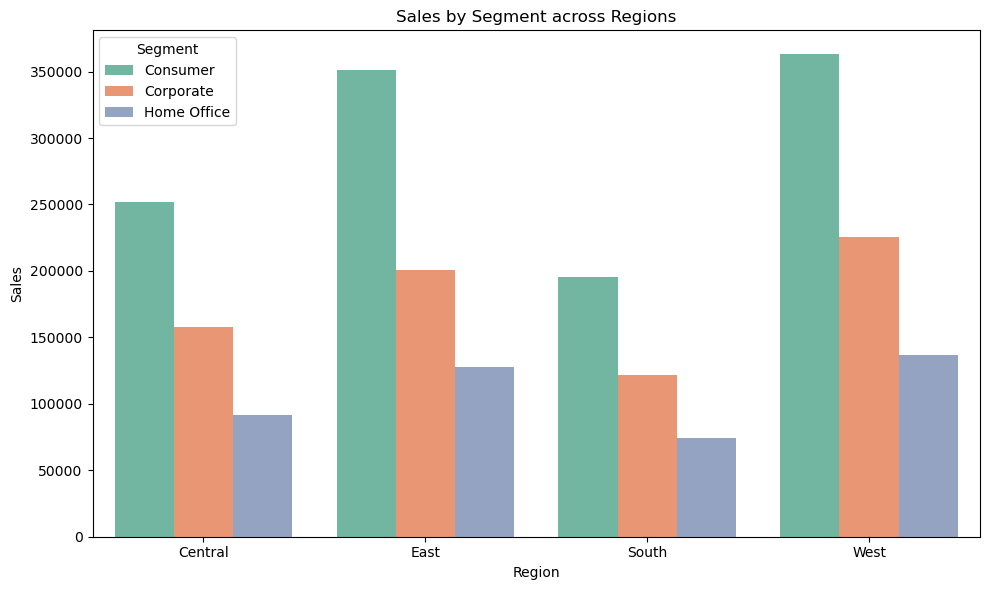

In [73]:
#grouped bar chart will show sales by segment across regions 
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
sns.barplot(data=seg_region_pref, x='region', y='sales', hue='segment', palette='Set2')

plt.title('Sales by Segment across Regions')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

In [85]:
#Next Step: Product-level Deep Dive
#Top 10 Products by Sales
top_10_products= df.groupby('product_name')['sales'].sum().sort_values(ascending = False).head(10).reset_index()
print(top_10_products)

                                        product_name      sales
0              Canon imageCLASS 2200 Advanced Copier  61599.824
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
2  Cisco TelePresence System EX90 Videoconferenci...  22638.480
3       HON 5400 Series Task Chairs for Big and Tall  21870.576
4         GBC DocuBind TL300 Electric Binding System  19823.479
5   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
6               Hewlett Packard LaserJet 3310 Copier  18839.686
7  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
8          GBC DocuBind P400 Electric Binding System  17965.068
9        High Speed Automatic Electric Letter Opener  17030.312


In [79]:
#Top 10 Products by Profit
top_10_products_profit= df.groupby('product_name')['profit'].sum().sort_values(ascending = False).head(10).reset_index()
print(top_10_products)

                                        product_name      profit
0              Canon imageCLASS 2200 Advanced Copier  25199.9280
1  Fellowes PB500 Electric Punch Plastic Comb Bin...   7753.0390
2               Hewlett Packard LaserJet 3310 Copier   6983.8836
3                 Canon PC1060 Personal Laser Copier   4570.9347
4  HP Designjet T520 Inkjet Large Format Printer ...   4094.9766
5                  Ativa V4110MDD Micro-Cut Shredder   3772.9461
6   3D Systems Cube Printer, 2nd Generation, Magenta   3717.9714
7  Plantronics Savi W720 Multi-Device Wireless He...   3696.2820
8               Ibico EPK-21 Electric Binding System   3345.2823
9                  Zebra ZM400 Thermal Label Printer   3343.5360


In [81]:
#Most Loss-Making Products
bottom_10_products = df.groupby('product_name')['profit'].sum().sort_values(ascending= True).head(10).reset_index()
print(bottom_10_products)

                                        product_name     profit
0          Cubify CubeX 3D Printer Double Head Print -8879.9704
1          Lexmark MX611dhe Monochrome Laser Printer -4589.9730
2          Cubify CubeX 3D Printer Triple Head Print -3839.9904
3  Chromcraft Bull-Nose Wood Oval Conference Tabl... -2876.1156
4  Bush Advantage Collection Racetrack Conference... -1934.3976
5          GBC DocuBind P400 Electric Binding System -1878.1662
6  Cisco TelePresence System EX90 Videoconferenci... -1811.0784
7  Martin Yale Chadless Opener Electric Letter Op... -1299.1836
8                       Balt Solid Wood Round Tables -1201.0581
9  BoxOffice By Design Rectangular and Half-Moon ... -1148.4375


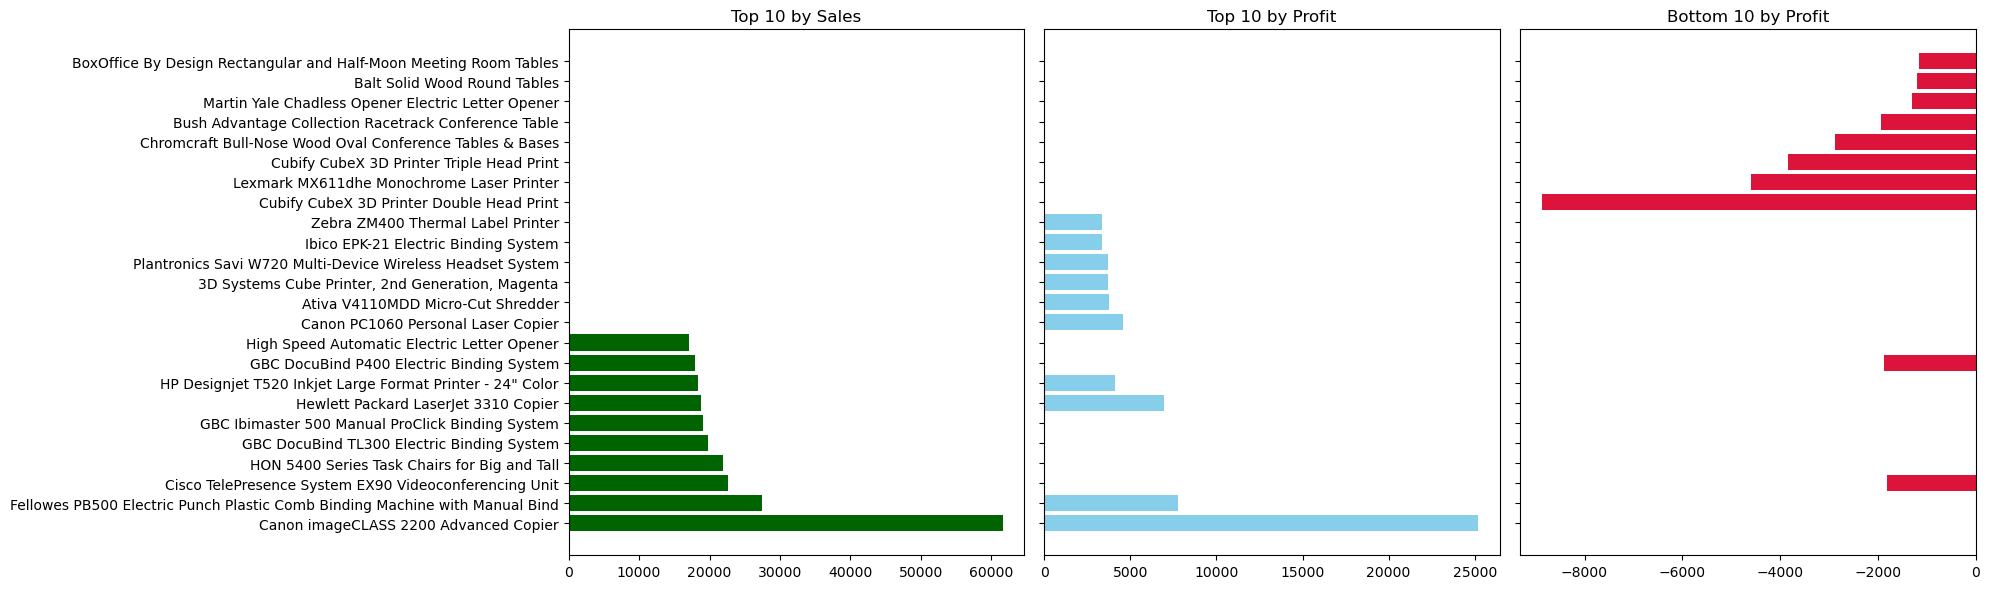

In [94]:
## grpahs for the top,bottom and loss-making products
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Sales
axes[0].barh(top_10_products['product_name'], top_10_products['sales'], color='darkgreen')
axes[0].set_title('Top 10 by Sales')

# Profit
axes[1].barh(top_10_products_profit['product_name'], top_10_products_profit['profit'], color='skyblue')
axes[1].set_title('Top 10 by Profit')

# Loss
axes[2].barh(bottom_10_products['product_name'], bottom_10_products['profit'], color='crimson')
axes[2].set_title('Bottom 10 by Profit')

plt.tight_layout()
plt.show()

In [100]:
#Customer Insights – Top Customers & Segmentation
#🎯 Objective:
#Identify the top customers by revenue, and look at how customer segments behave in terms of sales and profit.

# Step 1: Top 10 Customers by Sales
top_10_customers = df.groupby('customer_name').agg({
    'sales': 'sum',
    'profit': 'sum'
}).sort_values(by= 'sales' , ascending= False).head(10).reset_index()
print(top_10_customers)

        customer_name      sales     profit
0         Sean Miller  25043.050 -1980.7393
1        Tamara Chand  19052.218  8981.3239
2        Raymond Buch  15117.339  6976.0959
3        Tom Ashbrook  14595.620  4703.7883
4       Adrian Barton  14473.571  5444.8055
5        Ken Lonsdale  14175.229   806.8550
6        Sanjit Chand  14142.334  5757.4119
7        Hunter Lopez  12873.298  5622.4292
8        Sanjit Engle  12209.438  2650.6769
9  Christopher Conant  12129.072  2177.0493


In [102]:
 #Step 2: Sales and Profit by Customer Segment
segment_perf = df.groupby('segment').agg({
    'sales': 'sum',
    'profit': 'sum'
}).reset_index()
print(segment_perf)

       segment         sales       profit
0     Consumer  1.161401e+06  134119.2092
1    Corporate  7.061464e+05   91979.1340
2  Home Office  4.296531e+05   60298.6785


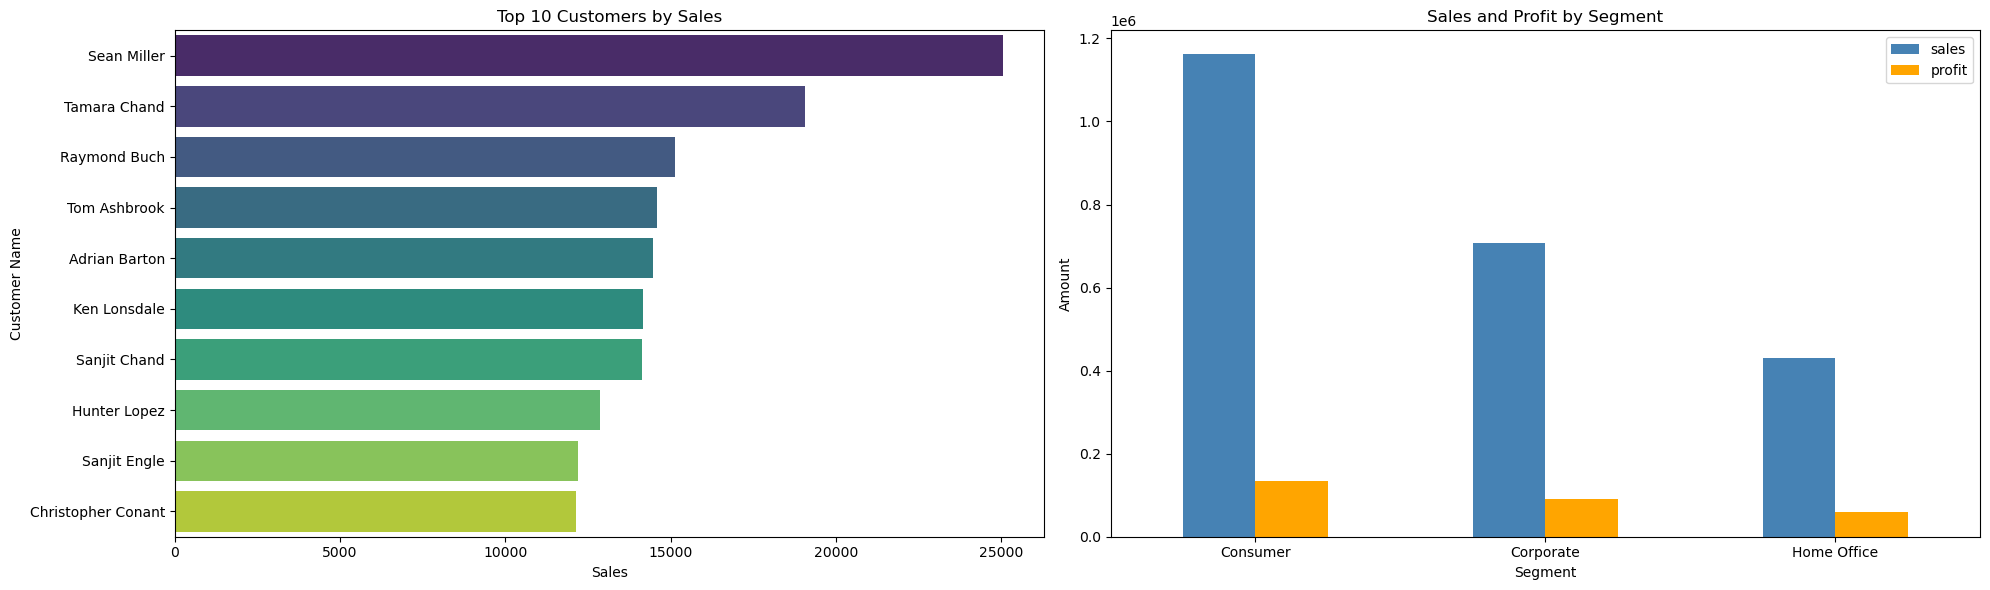

In [121]:
# Making graphs for top customers and sales and profit by customer_segment 
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# Top 10 customers by sales 
sns.barplot(x='sales', y='customer_name', data=top_10_customers,ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Customers by Sales')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Customer Name')

# Sales and Profit by customer_segment 
segment_perf.plot(x='segment', y=['sales', 'profit'], kind='bar', color=['steelblue', 'orange'], ax=axes[1])
axes[1].set_title('Sales and Profit by Segment')
axes[1].set_ylabel('Amount')
axes[1].set_xlabel('Segment')
axes[1].tick_params(axis='x', rotation=0) 

plt.tight_layout()
plt.show()

In [124]:
# Step 1: Ship Mode Performance
ship_mode_pref= df.groupby('ship_mode').agg({
    'sales' :'sum', 
    'profit':'sum',
    'order_id':'count'
}).rename(columns= {'order_id':'order_count'}).reset_index()
print(ship_mode_pref)
    

        ship_mode         sales       profit  order_count
0     First Class  3.514284e+05   48969.8399         1538
1        Same Day  1.283631e+05   15891.7589          543
2    Second Class  4.591936e+05   57446.6354         1945
3  Standard Class  1.358216e+06  164088.7875         5968


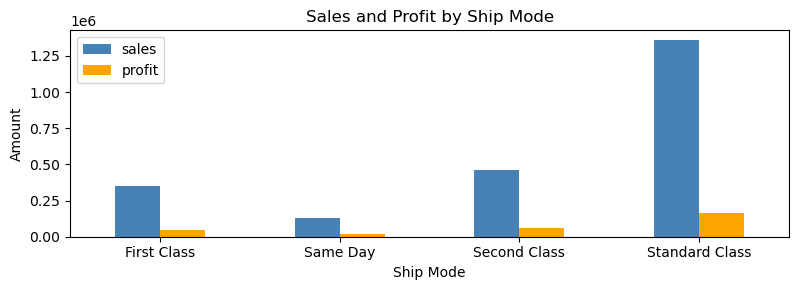

In [129]:
# Graph for Ship Mode Analysis
ship_mode_pref.plot(x='ship_mode', y=['sales', 'profit'], kind='bar',figsize=(8, 3), color=['steelblue', 'orange'])
plt.title('Sales and Profit by Ship Mode')
plt.ylabel('Amount')
plt.xlabel('Ship Mode')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [134]:
#🚚 Delivery Time Analysis
df['Delivery time(Days)'] = (df['ship_date'] - df['order_date']).dt.days


In [135]:
# Delivery Time Summary
print(df['Delivery time(Days)'].describe())

count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Delivery time(Days), dtype: float64


In [136]:
#Step 3: Delivery Time by Ship Mode
delivery_by_mode= df.groupby('ship_mode')['Delivery time(Days)'].mean().sort_values().reset_index()
print(delivery_by_mode)

        ship_mode  Delivery time(Days)
0        Same Day             0.044199
1     First Class             2.182705
2    Second Class             3.238046
3  Standard Class             5.006535


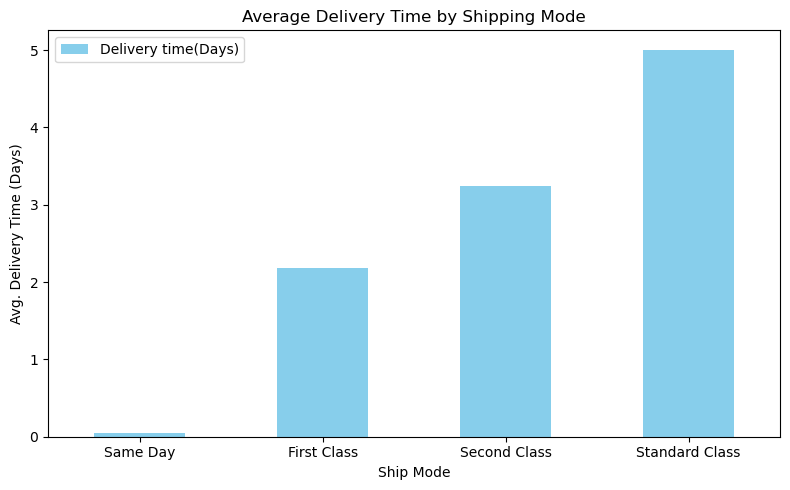

In [145]:
#Graph for  Delivery Time by Ship Mode
delivery_by_mode.plot(x = 'ship_mode' , y = 'Delivery time(Days)', kind= 'bar' ,  figsize= (8,5), color= ['skyblue'])
plt.title('Average Delivery Time by Shipping Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Avg. Delivery Time (Days)')
plt.xticks(rotation= 0)
plt.tight_layout()
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


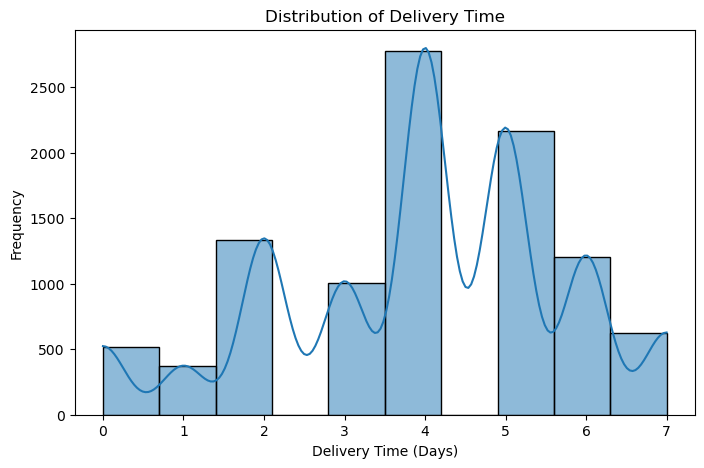

In [146]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Delivery time(Days)'], bins=10, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.show()

In [148]:
#Delivery Time by Region
delivery_region = df.groupby('region')['Delivery time(Days)'].mean().sort_values().reset_index()
print(delivery_region)
#Delivery Time by Customer Segment
delivery_segment = df.groupby('segment')['Delivery time(Days)'].mean().sort_values().reset_index()
print(delivery_segment)

    region  Delivery time(Days)
0     East             3.908708
1     West             3.929753
2    South             3.958025
3  Central             4.058115
       segment  Delivery time(Days)
0  Home Office             3.922042
1     Consumer             3.941822
2    Corporate             4.007616


In [149]:
#long_deliveries
long_deliveries = df[df['Delivery time(Days)'] > 5]
print(long_deliveries.shape[0], "orders took more than 5 days to deliver")

1824 orders took more than 5 days to deliver


<Axes: title={'center': 'Monthly Average Delivery Time'}, xlabel='Month'>

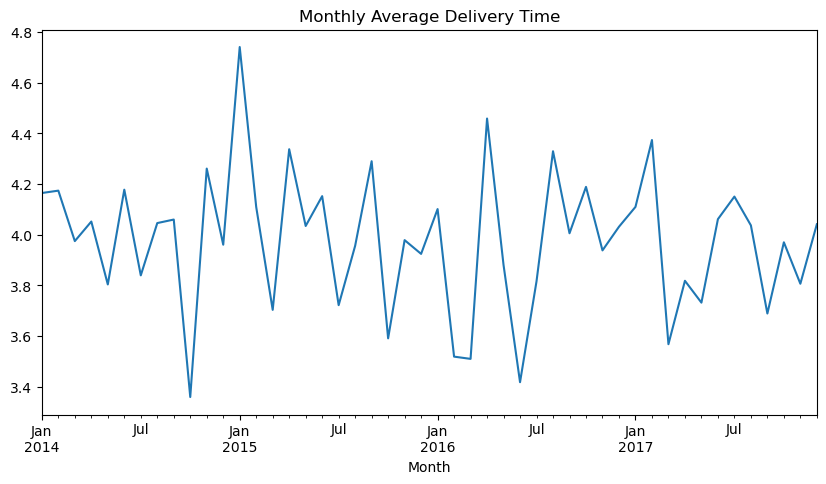

In [150]:
#monthly trend of average delivery time 
df['Month'] = df['order_date'].dt.to_period('M')
monthly_trend = df.groupby('Month')['Delivery time(Days)'].mean()

monthly_trend.plot(figsize=(10, 5), title='Monthly Average Delivery Time')
